Mean Absolute Error (MAE): 0.504
Mean Squared Error (MSE): 0.39
R^2 Score: 0.403
Accuracy within ±0.5: 57.19%

Feature Coefficients:
                 Feature  Coefficient
0          fixed acidity     0.023085
1       volatile acidity    -1.001304
2            citric acid    -0.140821
3         residual sugar     0.006564
4              chlorides    -1.806503
5    free sulfur dioxide     0.005627
6   total sulfur dioxide    -0.003644
7                density   -10.351594
8                     pH    -0.393688
9              sulphates     0.841172
10               alcohol     0.281890

Confusion Matrix:


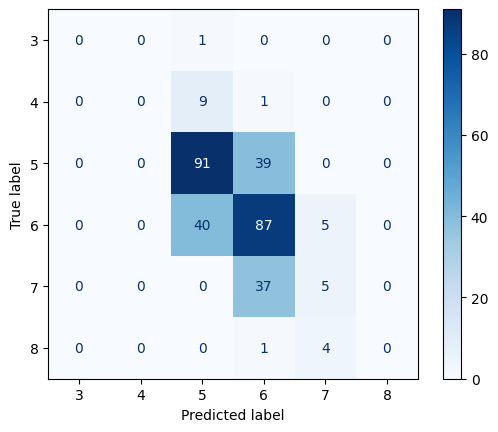

In [1]:
# Multiple Linear Regression for Wine Quality Prediction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Load the dataset
file_path = r"winequality_red.xlsx"
data = pd.read_excel(file_path)

# Step 2: Split features (X) and target (y)
X = data.drop('quality', axis=1)  # all columns except 'quality'
y = data['quality']  # target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("R^2 Score:", round(r2, 3))

# Step 7: Tolerance-based accuracy
tolerance = 0.5
accuracy = (np.abs(y_test - y_pred) <= tolerance).mean() * 100
print(f"Accuracy within ±{tolerance}: {accuracy:.2f}%")

# Optional: See coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Round predictions to nearest integer
y_pred_rounded = np.round(y_pred).astype(int)

# Clip predictions to the actual range of quality scores
y_pred_rounded = np.clip(y_pred_rounded, y.min(), y.max())

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred_rounded, labels=sorted(y.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

print("\nConfusion Matrix:")
disp.plot(cmap='Blues')



In [2]:
# Optimized SVM with tolerance-based accuracy scoring
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

# Step 1: Load the dataset
file_path = r"winequality_white.xlsx"
data = pd.read_excel(file_path)

# Step 2: Split features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define tolerance-based accuracy function - simplified to avoid serialization issues
def tolerance_accuracy(y_true, y_pred,tolerance=1):
    # Fixed tolerance of 1 to make function more serializable
    return np.mean(np.abs(y_true - y_pred) <= 1)

# Step 5: Create scorer
tolerance_scorer = make_scorer(tolerance_accuracy, greater_is_better=True)

# Step 6: Build pipeline (scaler + SVR)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Step 7: Define hyperparameter grid
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__gamma': ['scale', 0.01, 0.1],
    'svr__kernel': ['rbf']  
}
# Step 8: Grid Search
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=tolerance_scorer,
    cv=5,
    n_jobs=1,  
    verbose=2
)

grid_search.fit(X_train, y_train)

# Step 9: Best model prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Step 10: Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = np.mean(np.abs(y_test - y_pred) <= 1) * 100  
accuracy = tolerance_accuracy(y_test, y_pred) * 100

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("R^2 Score:", round(r2, 3))
print(f"Accuracy within ±1: {accuracy:.2f}%")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.5s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=0.01, svr__kernel=rbf; total time=   0.5s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=0.01, svr__kernel=rbf; total time=   0.4s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=0.01, svr__kernel=rbf; total time=   0.6s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=0.01, svr__kernel=rbf; total time=   0.6s
[CV] END svr__C=0.1, svr__epsilon=0.1, svr__gamma=0.01, svr__kernel=rbf; total time=   0.6s
[CV] END svr_

In [3]:
# neural network with tolerance-based accuracy optimization
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

# Step 1: Load the dataset
file_path = r"winequality_red.xlsx"
data = pd.read_excel(file_path)

# Step 2: Split features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build pipeline (scaler + MLP)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=1000, random_state=42))
])

# Step 5: Define hyperparameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(10,), (20,), (10, 5), (50, 25)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate_init': [0.001, 0.01]
}

# Step 6: Custom scoring function (tolerance-based accuracy)
def tolerance_accuracy(y_true, y_pred, tolerance=0.5):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

tolerance_scorer = make_scorer(tolerance_accuracy, greater_is_better=True)

# Step 7: Grid Search with custom scorer
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=tolerance_scorer,
    n_jobs=1,
    verbose=2
)
grid_search.fit(X_train, y_train)

# Step 8: Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
tolerance = 0.5
accuracy = (np.abs(y_test - y_pred) <= tolerance).mean() * 100

print("\nBest Hyperparameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", round(mae, 3))
print("Mean Squared Error (MSE):", round(mse, 3))
print("R^2 Score:", round(r2, 3))
print(f"Accuracy within ±{tolerance}: {accuracy:.2f}%")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.5s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.5s


c:\Users\Vipul Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.4s


c:\Users\Vipul Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.6s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__learning_rate_init=0.001; total time=   1.2s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(20,), mlp__le

c:\Users\Vipul Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.4s


c:\Users\Vipul Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.5s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__learning_rate_init=0.001; total time=   1.2s
[CV] END mlp__activation=relu, mlp__alpha=0.001, mlp__hidden_layer_sizes=(20,), mlp__learning_r

c:\Users\Vipul Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.4s


c:\Users\Vipul Muskan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.001; total time=   1.5s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.3s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(10,), mlp__learning_rate_init=0.01; total time=   0.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__learning_rate_init=0.001; total time=   1.2s
[CV] END mlp__activation=relu, mlp__alpha=0.01, mlp__hidden_layer_sizes=(20,), mlp__learning_rate_init

In [4]:
## Random Forest optimized with GridSearch (using tolerance-based accuracy)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# Load dataset
file_path = r"winequality_red.xlsx"
data = pd.read_excel(file_path)

X = data.drop('quality', axis=1)
y = data['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tolerance-based accuracy scorer
def tolerance_accuracy(y_true, y_pred, tolerance=1):
    return np.mean(np.abs(y_true - y_pred) <= tolerance)

tolerance_scorer = make_scorer(tolerance_accuracy, greater_is_better=True)

# Model
rf = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Grid Search with tolerance-based accuracy as scoring metric
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring=tolerance_scorer,
    verbose=2,
    n_jobs=1
)

# Fit
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = tolerance_accuracy(y_test, y_pred, tolerance=1) * 100

print("Test MAE:", round(mae, 3))
print("Test R^2:", round(r2, 3))
print("Accuracy within ±1:", f"{accuracy:.2f}%")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_e


Feature Importances:
                 Feature  Importance
10               alcohol    0.303749
9              sulphates    0.159101
1       volatile acidity    0.114646
6   total sulfur dioxide    0.074240
4              chlorides    0.063686
8                     pH    0.055431
3         residual sugar    0.052652
0          fixed acidity    0.048550
7                density    0.043069
2            citric acid    0.042659
5    free sulfur dioxide    0.042218


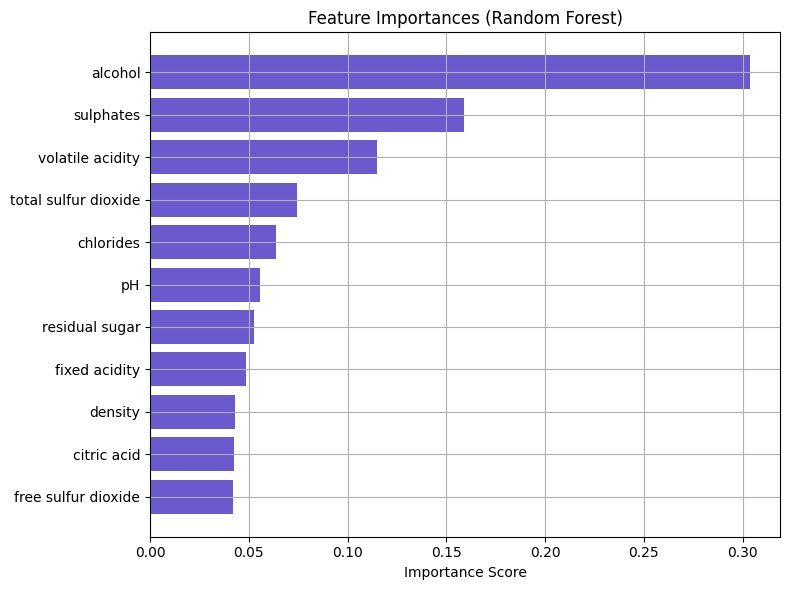

In [5]:
# Feature Importance (after model is trained)
import matplotlib.pyplot as plt

importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for sorting and plotting
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Print the importances
print("\nFeature Importances:")
print(importance_df.sort_values(by='Importance', ascending=False))

# Optional: Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='slateblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.grid(True)
plt.show()
